## 15.2- Caso de Estudio - Clasificación

### 15.2.1.- Cargar el dataset

Carga load_digits desde sklearn.datasets y luego metelo en un objeto

In [1]:
from sklearn.datasets import load_digits

Imprime la descripcion del dataset

In [2]:
digits = load_digits()

In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

Checa el target de tu nuevo objeto digitos

In [5]:
digits.target[::100]

array([0, 4, 1, 7, 4, 8, 2, 2, 4, 4, 1, 9, 7, 3, 2, 1, 2, 5])

Ahora prueba revisando la forma del arreglo digitos

In [6]:
digits.data.shape

(1797, 64)

Y la forma del arreglo target

In [7]:
digits.target.shape

(1797,)

Vamos revisando la imagen 15 del arreglo... no es lo que esperas

In [10]:
digits.images[15] 
### ccada numero representa la intenidad dde cada pixel en la matriz, dependiendo si se acerca mas al negro
### o no, de esta forma se puede verificar si se trata de un numero o de alguna otra cosa en especifico
### de igual manera se hace una evaluacion en base a la intensidad de los pixeles 

array([[ 0.,  5., 12., 13., 16., 16.,  2.,  0.],
       [ 0., 11., 16., 15.,  8.,  4.,  0.,  0.],
       [ 0.,  8., 14., 11.,  1.,  0.,  0.,  0.],
       [ 0.,  8., 16., 16., 14.,  0.,  0.,  0.],
       [ 0.,  1.,  6.,  6., 16.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 16.,  3.,  0.,  0.],
       [ 0.,  1.,  5., 15., 13.,  0.,  0.,  0.],
       [ 0.,  4., 15., 16.,  2.,  0.,  0.,  0.]])

y ahora veamos el .data para ver el arreglo en 1x64

In [11]:
digits.data[15]

### se aplano completamente para que python pueda leer los datos correspondientes 

array([ 0.,  5., 12., 13., 16., 16.,  2.,  0.,  0., 11., 16., 15.,  8.,
        4.,  0.,  0.,  0.,  8., 14., 11.,  1.,  0.,  0.,  0.,  0.,  8.,
       16., 16., 14.,  0.,  0.,  0.,  0.,  1.,  6.,  6., 16.,  0.,  0.,
        0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.,  0.,  1.,  5., 15.,
       13.,  0.,  0.,  0.,  0.,  4., 15., 16.,  2.,  0.,  0.,  0.])

### 15.2.2.- Visualizar los datos

Veamos los datos utilizando matplotlib, comienza importando esta libreria

In [12]:
import matplotlib.pyplot as plt 

Ahor adibuja una cuadricula para lograr tu cometido

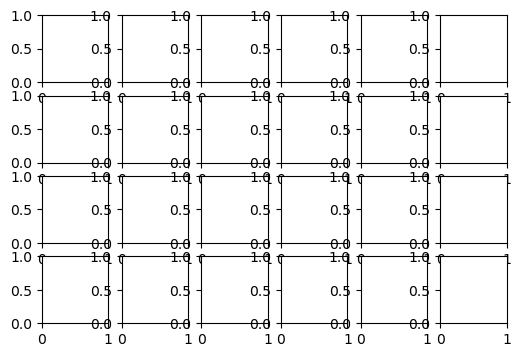

In [15]:
figure,axes = plt.subplots(nrows=4 , ncols=6,figsize= (6,4))

a continuación, vamos a usar un for paraiterar en paralelo a traves de los 24 cuadritos y traer las priemras 24 imagenes

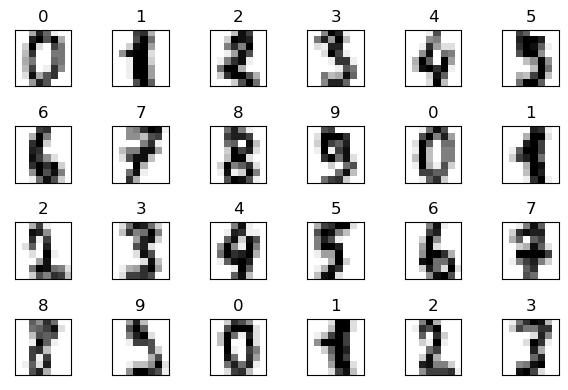

In [22]:
## muestra de como se inter´retan los datos en python, cada imagen tiene sus pixeles y dependiendo de la intensidad de los pixeles 

figure,axes = plt.subplots(nrows=4 , ncols=6,figsize= (6,4))
for item in zip(axes.ravel(), digits.images,digits.target):
    axes,image,target=item
    axes.imshow(image,cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(target)
plt.tight_layout()

### 15.2.3.- Separar el dataset para entrenamientos y pruebas

ok, ahora vamos a importar train_test_split desde sklearn.model_selection

In [23]:
from sklearn.model_selection import train_test_split

Y a continuación generar el split entre test y train

In [24]:
x_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target,random_state=11) ### randomizacion de los datos

Veamos las shapes de nuestros sets para X (muestras)

In [26]:
x_train.shape   ## datos de prueba

(1347, 64)

In [27]:
x_test.shape  ## datos de entrenamiento

(450, 64)

### 15.2.4.- Crear el modelo

Ahora importamos el KNeighborsClassifier

In [28]:
from sklearn.neighbors import KNeighborsClassifier

y armamos un objeto llamado KNN de este Clasificador

In [31]:
KNN = KNeighborsClassifier()     ## estimador, depende del algoritmo que le damos(kneigbors)!!!

### 15.2.5.- Entrenar el modelo

Ahora arma el método fit para cargar los datos en el estimador, 

metodo fit carga la muestra de entrenamiento y muestra
los objetivos de entrenamiento para ayudar a predecir

In [33]:
KNN.fit(X=x_train,y=y_train)

KNeighborsClassifier()

### 15.2.6.- Predecir clases de dígitos

Arma un objeto llamdo prediccion

In [34]:
prediccion = KNN.predict(X=x_test)

C:\Users\mmart\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Arma un objeto llamado esperado

In [35]:
esperado = y_test

Comparemos predicho vs esperado

In [36]:
prediccion[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6])

In [37]:
esperado[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6])

armamos una comprension de lista para localizar todas las predicciones incorrectas

In [38]:
equivocados=[(p,e) for (p,e) in zip(prediccion,esperado) if p!=e]
equivocados

[(5, 3),
 (8, 9),
 (4, 9),
 (7, 3),
 (7, 4),
 (2, 8),
 (9, 8),
 (3, 8),
 (3, 8),
 (1, 8)]

## 15.3 Clasificación parte 2 - Dataset de digitos

### 15.3.1.- Metricas para la exactitud del modelo, como saber si es bueno o no

Usa knn.score para conocer que tan bien se desempeño tu estimador

In [41]:
print(f'{KNN.score(x_test, y_test):.2%}')

97.78%


C:\Users\mmart\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Ahora vamos a ahacer una matriz de confusion para ver los hits y misses para una clase dada, llama la funcion matriz de confusión desde sklearn metricsModule

In [42]:
## se debe importar el modulo que nos permite hacer la matriz de confusion 

from sklearn.metrics import confusion_matrix

Y ahora armar tu matriz de confusion

In [43]:
confusion = confusion_matrix(y_true=esperado,y_pred=prediccion)

Checa los resultados

In [46]:
confusion

### cada linea representa un digito, la diagonal es la cantidad de predicciones que saco correctamente

### primera linea: 45 predicciones se realizaron diciendo que el 0 era un cero
### cuarta linea: 42 predicciones se hicieron que el 3 era un 3 PERO 1  que un 3 era un 5, otra que un 3 era un 7.
### el digito 8 fue el que mas fallo, es muy dificl de leer para la computadora

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 49,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  1,  1,  2,  0,  0,  0,  0, 39,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 41]], dtype=int64)

Ahora sigue un reporte de calsificación, importa classification_report desde sklearn.metrics

In [47]:
from sklearn.metrics import classification_report

Y ahora crea una comprension de lista que nos de los nombres de los digitos

In [51]:
nombres = [str(digit) for digit in digits.target_names]

Y termina haciendo tu reporte de clasificacion

In [52]:
nombres

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

Y ahora ahremos un heatmap con la matriz de confusion

In [53]:
print(classification_report(esperado,prediccion,target_names=nombres))
## f1score= precision/recall

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        45
           2       0.98      1.00      0.99        54
           3       0.95      0.95      0.95        44
           4       0.98      0.98      0.98        50
           5       0.97      1.00      0.99        38
           6       1.00      1.00      1.00        42
           7       0.96      1.00      0.98        45
           8       0.97      0.89      0.93        44
           9       0.98      0.95      0.96        43

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



In [56]:
import pandas as pd


In [61]:
confusion_df= pd.DataFrame(confusion, index=range(10),columns=range(10))
confusion_df


,0,1,2,3,4,5,6,7,8,9
0,45,0,0,0,0,0,0,0,0,0
1,0,45,0,0,0,0,0,0,0,0
2,0,0,54,0,0,0,0,0,0,0
3,0,0,0,42,0,1,0,1,0,0
4,0,0,0,0,49,0,0,1,0,0
5,0,0,0,0,0,38,0,0,0,0
6,0,0,0,0,0,0,42,0,0,0
7,0,0,0,0,0,0,0,45,0,0
8,0,1,1,2,0,0,0,0,39,1
9,0,0,0,0,1,0,0,0,1,41


In [58]:
import seaborn as sns


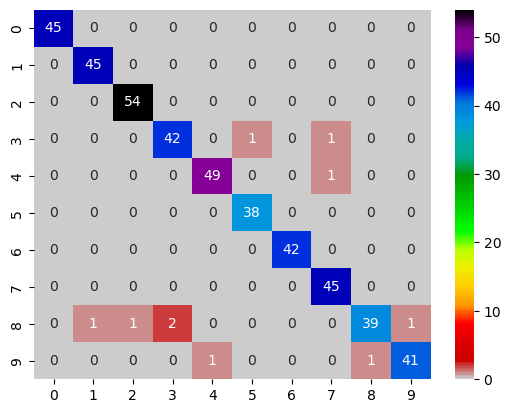

In [63]:
axes = sns.heatmap(confusion_df, annot=True,cmap='nipy_spectral_r')

### 15.3.2.- K-Fold Validación Cruzada

Importa kfold desde sklearn.modelselection

In [65]:
from sklearn.model_selection import KFold

Crea tu primer objeto kfold

In [66]:
kfold= KFold(n_splits=10,random_state=11, shuffle=True)

Ahora importa cross_val_score

In [67]:
from sklearn.model_selection import cross_val_score

Y crea un objeto llamado puntuacion para probar tu modelo

In [70]:
puntuacion = cross_val_score(estimator = KNN, X=digits.data,y=digits.target, cv=kfold)

C:\Users\mmart\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\mmart\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Checa los resultados

In [71]:
puntuacion

array([0.97777778, 0.99444444, 0.98888889, 0.97777778, 0.98888889,
       0.99444444, 0.97777778, 0.98882682, 1.        , 0.98882682])

In [72]:
puntuacion.mean()

0.9877653631284916

In [73]:
puntuacion.std()

0.007368447328906141

### 15.3.3.- Varios Modelos hasta dar con el bueno

Importa SVC y GaussianNB, otros dos estimadores como el de K-vecinos cercanod

In [74]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

Crea los estimadores en un diccionario

In [75]:
estimadores = {"KNeighborsClassifier":KNN,"SVC":SVC(gamma="scale"),"GaussianNB":GaussianNB()}

Ejecuta los modelos con un for

In [77]:
for nombreestimador,objetoestimador, in estimadores.items():
    kfold=KFold(n_splits=10,random_state=7,shuffle=True)
    evaluaciones=cross_val_score(estimator=objetoestimador,X=digits.data,y=digits.target,cv=kfold)
    print(f'{nombreestimador:>20}: '+f'Precisión promedio={evaluaciones.mean():0.2%} '+f'Desviación estándar={evaluaciones.std():0.2%} ')

C:\Users\mmart\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\mmart\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

KNeighborsClassifier: Precisión promedio=98.50% Desviación estándar=1.24% 
                 SVC: Precisión promedio=98.83% Desviación estándar=0.76% 
          GaussianNB: Precisión promedio=83.41% Desviación estándar=3.90% 


### 15.3.3.- Ajustar Hiperparametros

Ajusta el hiperparametro para ver si alguno nos da mejor exactitud

In [82]:
for k in range(1,20,2):
    kfold=KFold(n_splits=10,random_state=11,shuffle=True)
    KNN=KNeighborsClassifier(n_neighbors=k)
    evaluaciones=cross_val_score(estimator=KNN,X=digits.data,y=digits.target,cv=kfold)
    print(f'k={k:<20}; '+f'Precisión promedio={evaluaciones.mean():0.2%} '+f'Desviación estándar={evaluaciones.std():0.2%} ')
    

C:\Users\mmart\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\mmart\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

k=1                   ; Precisión promedio=98.83% Desviación estándar=0.58% 


C:\Users\mmart\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\mmart\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

k=3                   ; Precisión promedio=98.83% Desviación estándar=0.72% 


C:\Users\mmart\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\mmart\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

k=5                   ; Precisión promedio=98.78% Desviación estándar=0.74% 


C:\Users\mmart\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\mmart\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

k=7                   ; Precisión promedio=98.44% Desviación estándar=0.96% 


C:\Users\mmart\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\mmart\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

k=9                   ; Precisión promedio=98.39% Desviación estándar=0.80% 


C:\Users\mmart\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\mmart\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

k=11                  ; Precisión promedio=98.33% Desviación estándar=0.90% 


C:\Users\mmart\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\mmart\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

k=13                  ; Precisión promedio=97.89% Desviación estándar=0.89% 


C:\Users\mmart\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\mmart\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

k=15                  ; Precisión promedio=97.83% Desviación estándar=0.95% 


C:\Users\mmart\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\mmart\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

k=17                  ; Precisión promedio=97.50% Desviación estándar=1.00% 
k=19                  ; Precisión promedio=97.66% Desviación estándar=0.96% 


C:\Users\mmart\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\mmart\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

## 15.4 Series de tiempo y simple regresión lineal

Importa pandas si no lo has hecho, carga los datos de casas

In [83]:
import pandas as pd

In [84]:
kchouse=pd.read_csv("kc_house_data.csv")

Dale nombre a las columnas del dataframe

In [86]:
kchouse.columns=["Areaft","PrecioUSD"]

Muestra los primeros 20 datos

In [89]:
kchouse.head(20)  
## cada columna es una serie, se debe coger la columna y volverla arreglo 

,Areaft,PrecioUSD
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0
5,5420,1230000.0
6,1715,257500.0
7,1060,291850.0
8,1780,229500.0
9,1890,323000.0


usemos train test split para training y pruebas

In [90]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test= train_test_split(kchouse.Areaft.values.reshape(-1,1),kchouse.PrecioUSD.values,random_state=11)
## Cambio de formato 

Chequemos los tamaños de train y test

In [98]:
X_test.shape

(5404, 1)

In [99]:
y_train.shape

(16209,)

importa LinearRegression de sklearn

In [101]:
from sklearn.linear_model import LinearRegression

Arma el estimador y haz el fit

In [102]:
reglin = LinearRegression()

In [104]:
reglin.fit(X=X_train, y=y_train)

LinearRegression()

Obten el Coef y el INtercept

In [105]:
reglin.coef_

array([283.3312025])

In [106]:
reglin.intercept_

-47648.888722138945

Probemos el modelo, crea los objetos prediccion y esperado

In [107]:
prediccion = reglin.predict(X_test)
esperado=y_test

In [108]:
for p,e in zip(prediccion[::300],esperado[::300]):
    print(f'Prediccion: {p:2f}, Esperado:{e:2f}')

Prediccion: 264015.434024, Esperado:343566.000000
Prediccion: 782511.534594, Esperado:650880.000000
Prediccion: 295748.528704, Esperado:340000.000000
Prediccion: 439680.779573, Esperado:770000.000000
Prediccion: 884510.767493, Esperado:775000.000000
Prediccion: 278181.994149, Esperado:420000.000000
Prediccion: 298015.178324, Esperado:940000.000000
Prediccion: 521846.828297, Esperado:627800.000000
Prediccion: 538846.700446, Esperado:880000.000000
Prediccion: 932677.071917, Esperado:730000.000000
Prediccion: 419847.595398, Esperado:610000.000000
Prediccion: 198849.257450, Esperado:395000.000000
Prediccion: 638012.621320, Esperado:675000.000000
Prediccion: 479347.147922, Esperado:301350.000000
Prediccion: 561513.196646, Esperado:950000.000000
Prediccion: 632345.997270, Esperado:569000.000000
Prediccion: 368847.978948, Esperado:432000.000000
Prediccion: 385847.851098, Esperado:412500.000000
Prediccion: 997843.248491, Esperado:1130000.000000


Arma un ciclo que muestre p vs e para los datos de 5 en 5

Vamos a predecir precios de casas usando area en sqft

In [109]:
predice = (lambda x:reglin.coef_*x+reglin.intercept_)

In [111]:
predice(1160)

array([281015.30617429])

Y ahora visaulizemos la regresion lineal con seaborn

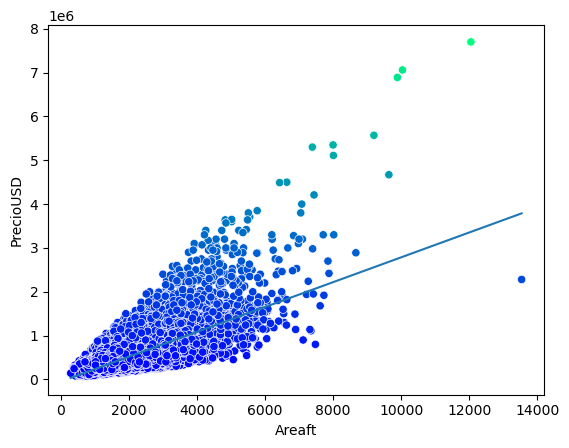

In [116]:
import seaborn as sns

axes = sns.scatterplot(data =kchouse,x="Areaft",y="PrecioUSD", hue= "PrecioUSD",palette="winter",legend=False)

import numpy as np
x= np.array([min(kchouse.Areaft.values),max(kchouse.Areaft.values)])
y= predice(x)

import matplotlib.pyplot as plt

line = plt.plot(x,y)

## 15.5 Regresion lineal multiple con los datos de California

### 15.5.1 Cargar el dataset

In [124]:
from sklearn.datasets import fetch_california_housing

In [125]:
california = fetch_california_housing()

In [126]:
print (california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [127]:
california.data.shape

(20640, 8)

In [129]:
 california.target.shape  ## precio de venta 

(20640,)

In [133]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

### 15.5.2 Explorar los datos

Importa Pandas si no lo has hecho, altera las precisiones a 4, max columns a 9 y display width a none

In [134]:
import pandas as pd 

In [136]:
pd.set_option("display.precision",4)

In [138]:
pd.set_option("display.max_columns",9)

In [144]:
pd.set_option("display.width",None)

Carga los datos de california en un dataframe

In [145]:
california_df=pd.DataFrame(california.data,columns=california.feature_names)

Agrega el target de california al mismo dataframe como una columna (Serie) adicional

In [146]:
california_df["Valorcasa"]=pd.Series(california.target)

Checa el head de california

In [147]:
california_df.head(20)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Valorcasa
0,8.3252,41.0,6.9841,1.0238,322.0,2.5556,37.88,-122.23,4.526
1,8.3014,21.0,6.2381,0.9719,2401.0,2.1098,37.86,-122.22,3.585
2,7.2574,52.0,8.2881,1.0734,496.0,2.8023,37.85,-122.24,3.521
3,5.6431,52.0,5.8174,1.0731,558.0,2.5479,37.85,-122.25,3.413
4,3.8462,52.0,6.2819,1.0811,565.0,2.1815,37.85,-122.25,3.422
5,4.0368,52.0,4.7617,1.1036,413.0,2.1399,37.85,-122.25,2.697
6,3.6591,52.0,4.9319,0.9514,1094.0,2.1284,37.84,-122.25,2.992
7,3.1200,52.0,4.7975,1.0618,1157.0,1.7883,37.84,-122.25,2.414
8,2.0804,42.0,4.2941,1.1176,1206.0,2.0269,37.84,-122.26,2.267
9,3.6912,52.0,4.9706,0.9902,1551.0,2.1723,37.84,-122.25,2.611


Hagamos un describe para ver que onda

In [148]:
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Valorcasa
count,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000
mean,3.8707,28.6395,5.4290,1.0967,1425.4767,3.0707,35.6319,-119.5697,2.0686
std,1.8998,12.5856,2.4742,0.4739,1132.4621,10.3860,2.1360,2.0035,1.1540
min,0.4999,1.0000,0.8462,0.3333,3.0000,0.6923,32.5400,-124.3500,0.1500
25%,2.5634,18.0000,4.4407,1.0061,787.0000,2.4297,33.9300,-121.8000,1.1960
50%,3.5348,29.0000,5.2291,1.0488,1166.0000,2.8181,34.2600,-118.4900,1.7970
75%,4.7432,37.0000,6.0524,1.0995,1725.0000,3.2823,37.7100,-118.0100,2.6472
max,15.0001,52.0000,141.9091,34.0667,35682.0000,1243.3333,41.9500,-114.3100,5.0000


### 15.5.3 Visualizar los datos

Vamos a armar un muestreo del 10% del dataset para ver mas facil las visualizaciones

In [149]:
muestra_df = california_df.sample(frac=0.1, random_state=17)

Importa Matplotlib

In [150]:
import matplotlib.pyplot as plt

IMporta Seaborn

In [151]:
import seaborn as sns 

Cambia la fuente de seaborn

In [152]:
sns.set(font_scale=2)

Ponlo tipo Whitegrid

In [153]:
sns.set_style("whitegrid")

Arma graficas de precio vs cada feature

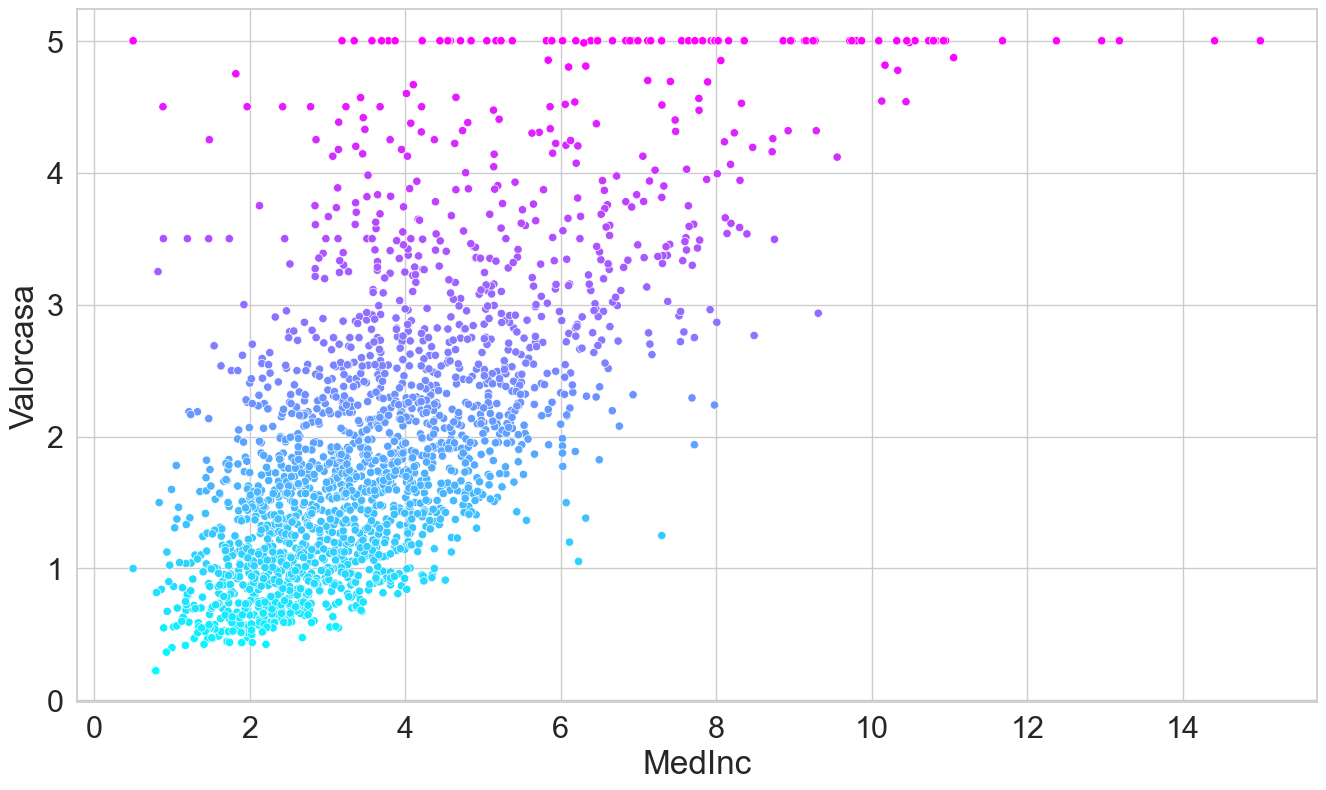

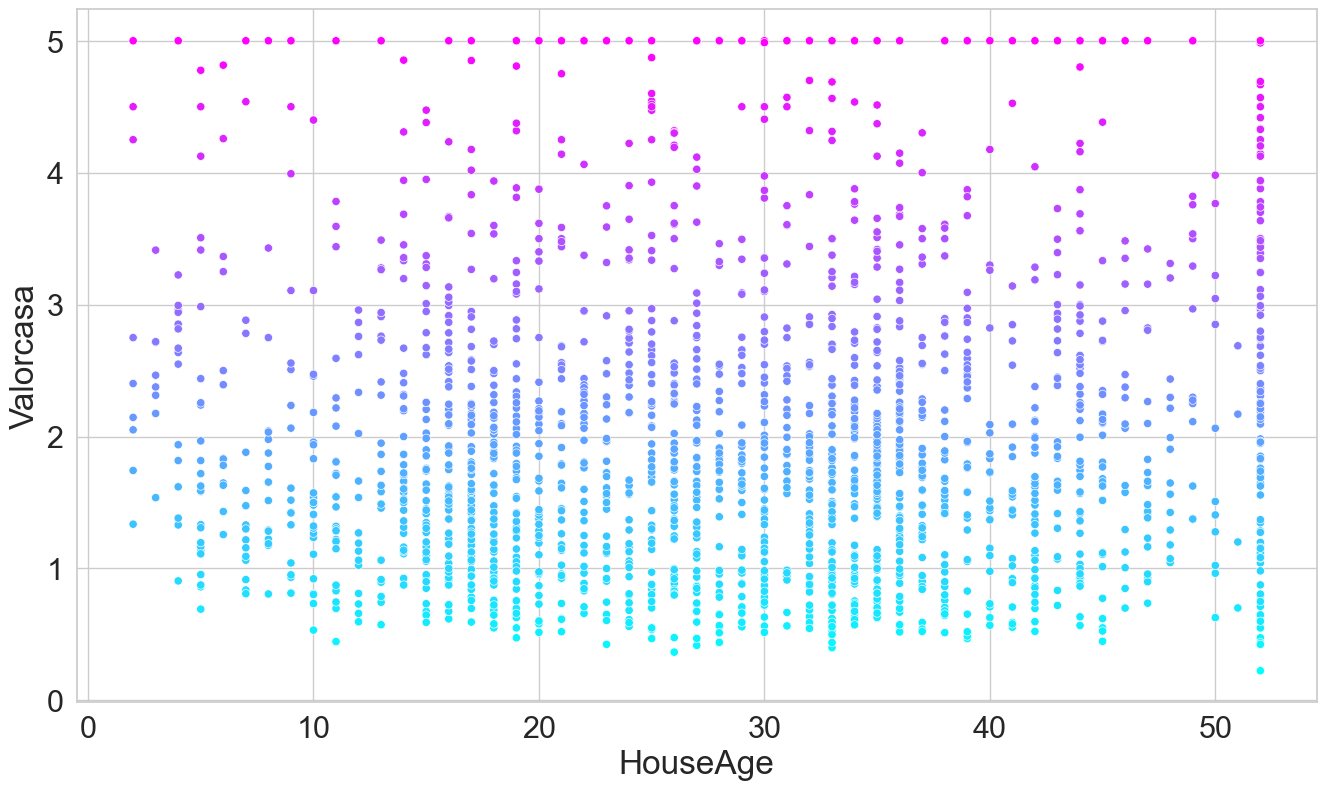

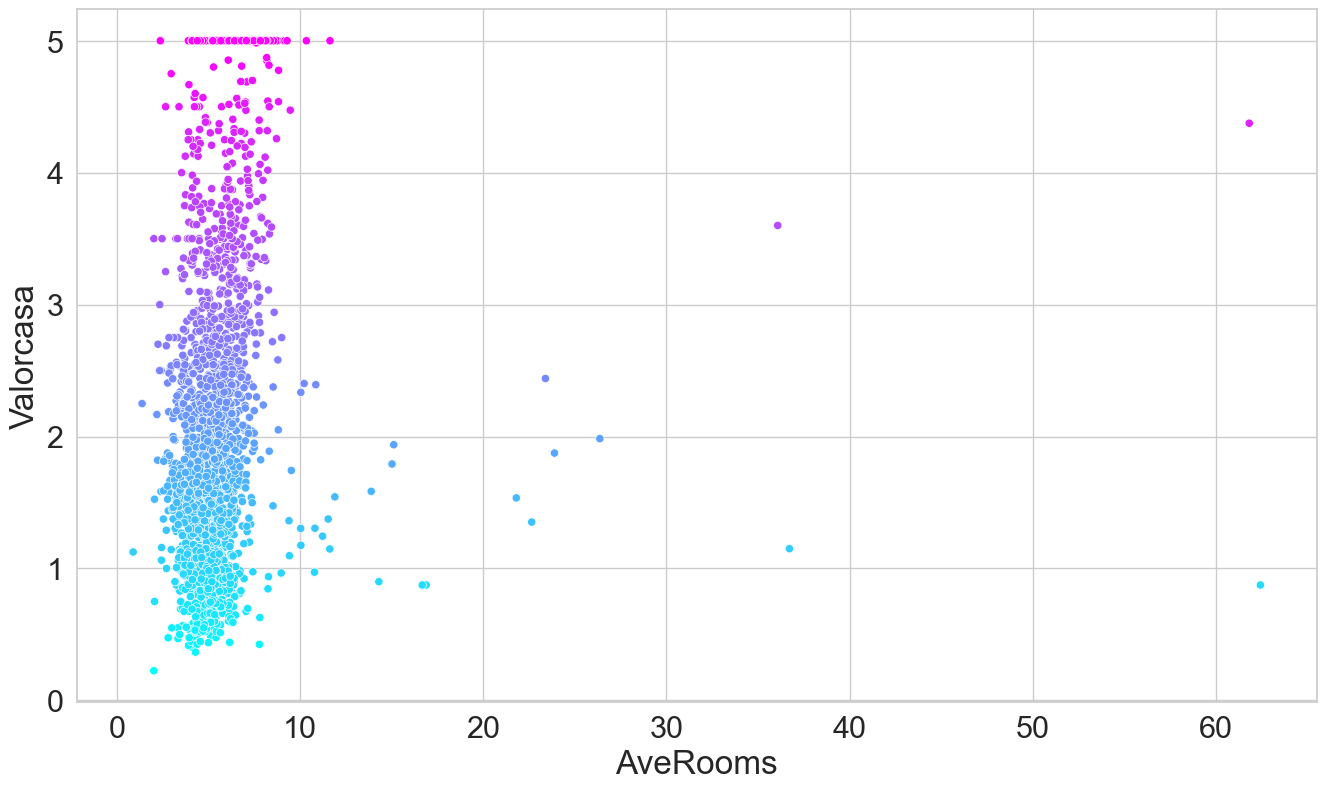

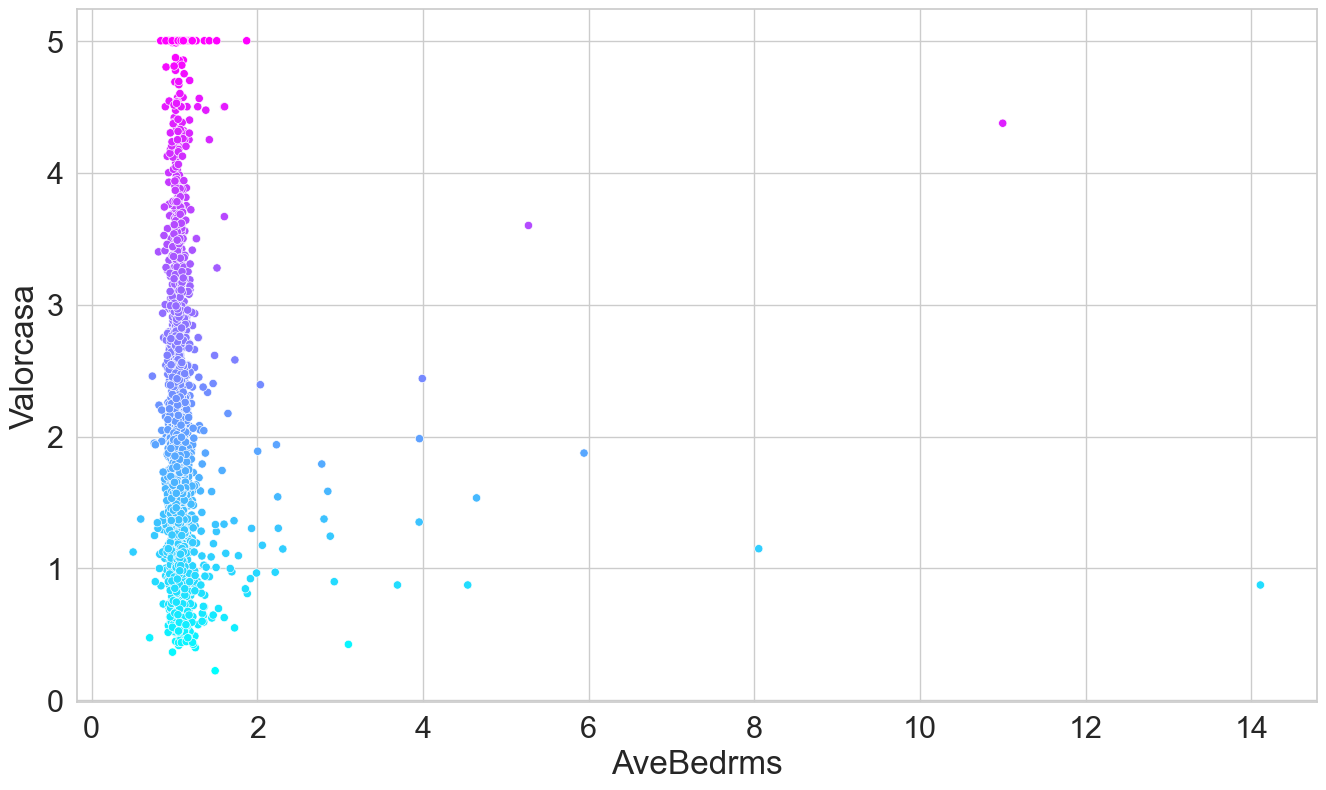

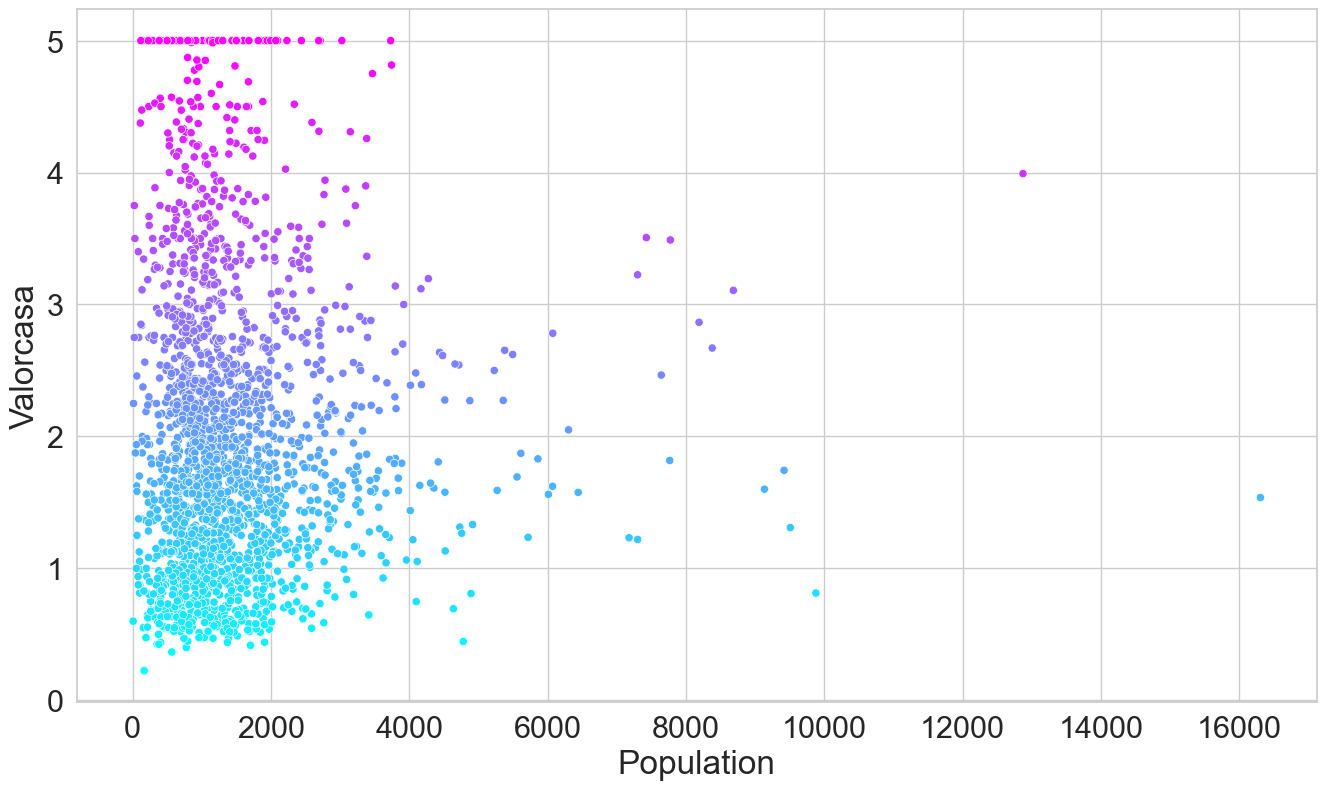

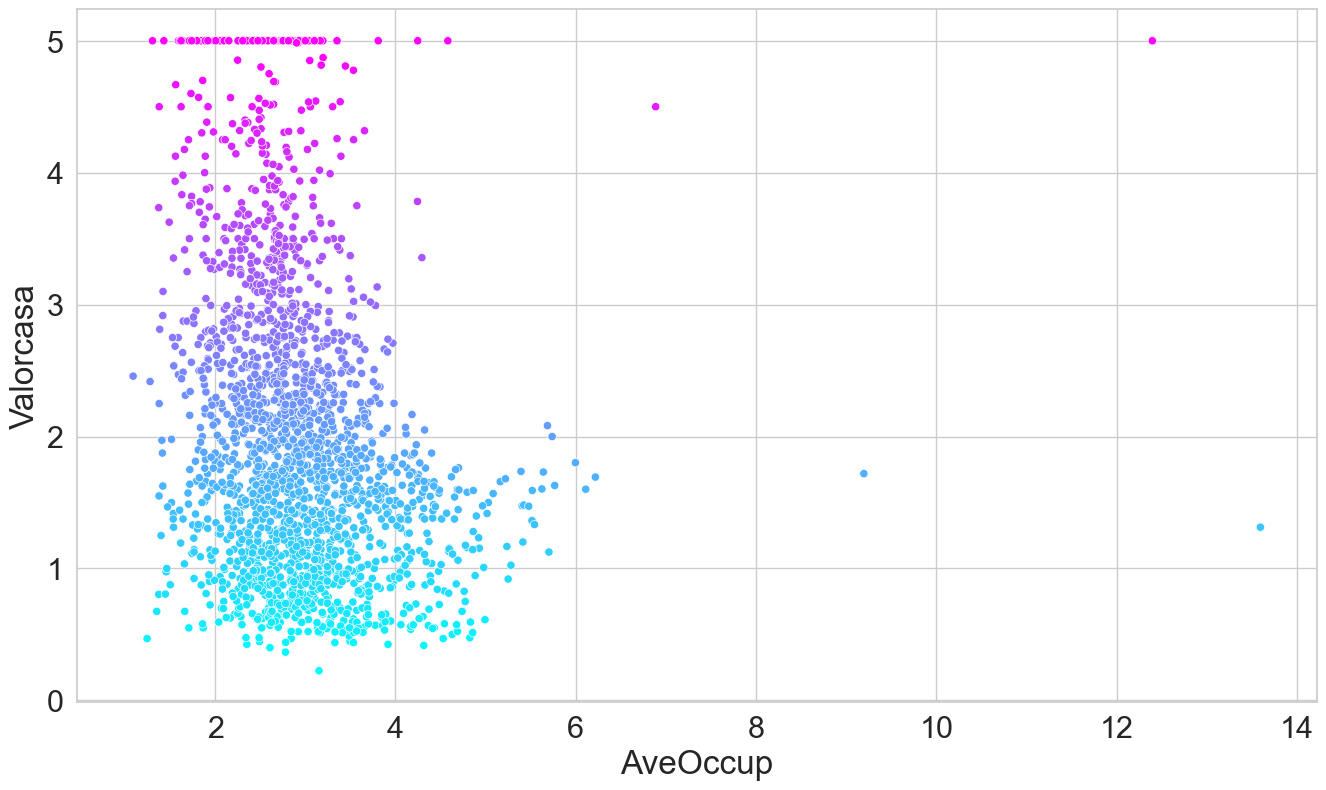

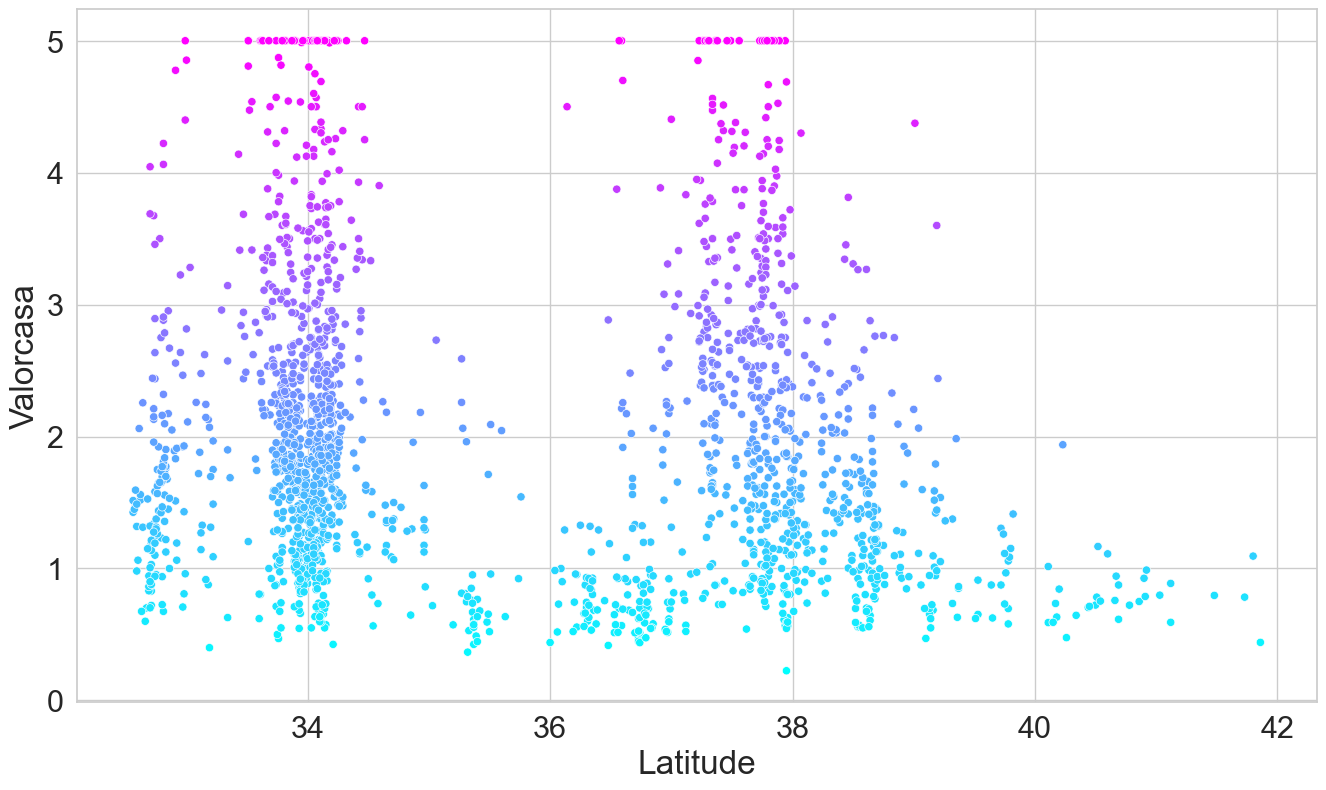

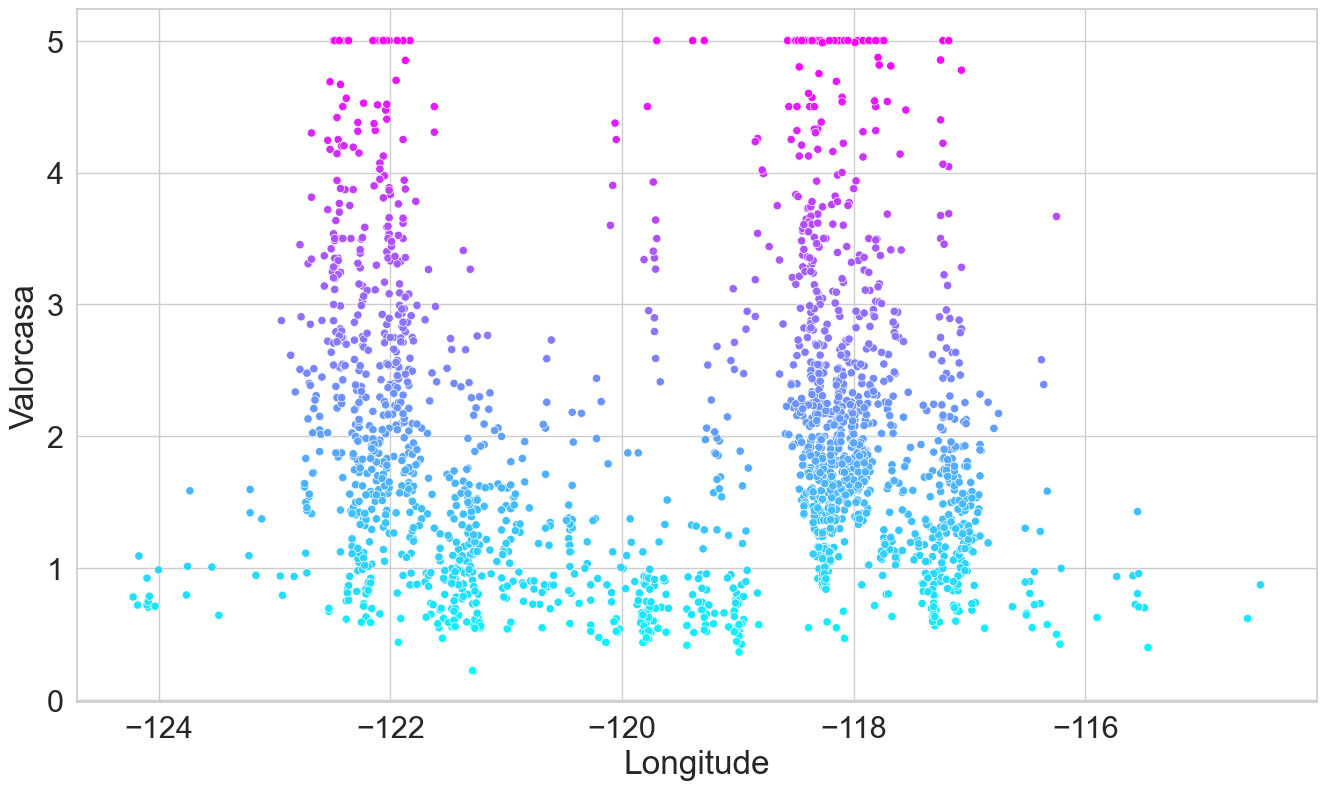

In [157]:
for feature in california.feature_names:
    plt.figure(figsize=(16,9))
    sns.scatterplot(data=muestra_df,x=feature,y="Valorcasa",hue="Valorcasa",palette="cool",legend=False)

### 15.5.4 Separar los datos para training y pruebas

Importa de sklearn.model_selection el train_test_split

In [158]:
 from sklearn.model_selection import train_test_split

Arma tu train test split

In [162]:
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, random_state=11)

Checa las figura de train

In [163]:
X_train.shape

(15480, 8)

Checa la figura de test

In [164]:
X_test.shape

(5160, 8)

### 15.5.5 Entrenar el modelo

Importa LinearRegression desde sklearn.linear_model

In [165]:
from sklearn.linear_model import LinearRegression

arma tu objeto reglin

In [166]:
reglin = LinearRegression()

Haz el fit

In [167]:
reglin.fit(X=X_train,y=y_train)

LinearRegression()

Arma tu for para enumerar todos los coeficientes

In [168]:
for i , name in enumerate(california.feature_names):
    print(f'{name:>10}:{reglin.coef_[i]}')

    MedInc:0.4377030215382207
  HouseAge:0.009216834565797805
  AveRooms:-0.10732526637360953
 AveBedrms:0.6117133073918067
Population:-5.75682200931564e-06
  AveOccup:-0.003384566465716353
  Latitude:-0.41948186096490636
 Longitude:-0.4337713349874019


Obten el intercept

In [169]:
reglin.intercept_

-36.88295065605551

### 15.5.6  Probar el modelo

Arma tu prediccion

In [170]:
prediccion = reglin.predict(X_test)

Arma tu lista de valores esperados

In [171]:
esperados = y_test

vamos a ver las primeras 5 predicciones

In [172]:
prediccion[:5]

array([1.25396876, 2.34693107, 2.03794745, 1.8701254 , 2.53608339])

vs los primeros 5 valores esperados

In [173]:
esperados[:5]

array([0.762, 1.732, 1.125, 1.37 , 1.856])

### 15.5.7  Visualizar los precios esperados vs predecidos

Arma un Dataframe vacio

In [174]:
df = pd.DataFrame()

Agregale una columna con los precios esperados

In [175]:
df["Esperados"]=pd.Series(esperados)

Otra con los precios predichos

In [176]:
df["Prediccion"]=pd.Series(prediccion)

Arma una figura de plt

Metele un scatterplot de seaborn

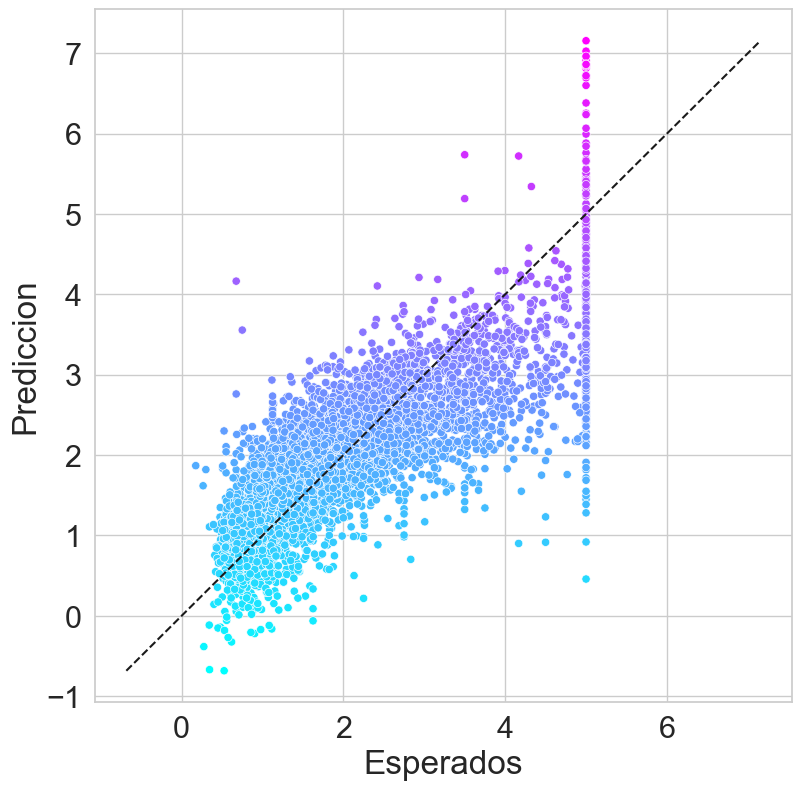

In [181]:
figura = plt.figure(figsize=(9,9))
axes=sns.scatterplot(data=df,x="Esperados",y="Prediccion",hue="Prediccion",palette="cool",legend=False)

start= min(esperados.min(),prediccion.min())
end = max(esperados.max(),prediccion.max())
line = plt.plot([start,end],[start,end],'k--')

### 15.5.8  Métricas del modelo de regresión

Importa metrics de sklearn

In [182]:
from sklearn import metrics as mt

Saca el r2

In [183]:
mt.r2_score(esperados,prediccion)

0.600898311596433

Saca el Mean Squared Error (Promedio de Errores Cuadrados)

In [185]:
mt.mean_squared_error(esperados,prediccion)

0.5350149774449121

### 15.5.9  Escoger el mejor modelo

In [188]:
from sklearn.linear_model import ElasticNet as met1
from sklearn.linear_model import Lasso as met2
from sklearn.linear_model import Ridge as met3

In [191]:
estimadores = {"Reglin":LinearRegression(),"ElasticNet":met1(),"Lasso":met2(),"Ridge":met3()}

In [192]:
from sklearn.model_selection import KFold,cross_val_score

In [194]:
for promest, objest in estimadores.items():
    kfold=KFold(n_splits=10,random_state=11,shuffle=True)
    puntajes = cross_val_score(estimator=objest,X=california.data,y=california.target,cv=kfold,scoring="r2")
    print(f'{promest:>16}' + f'Promedio de puntajes R2 = {puntajes.mean():.3f}')

          ReglinPromedio de puntajes R2 = 0.599
      ElasticNetPromedio de puntajes R2 = 0.423
           LassoPromedio de puntajes R2 = 0.285
           RidgePromedio de puntajes R2 = 0.599


## 15.6 Aprendizaje no supervisado parte 1

Importa load_digits (de nuevo) desde sklearn.datasets

In [1]:
from sklearn.datasets import load_digits

arma tu objeto load_digits

In [11]:
digits=load_digits()

Importa TSNE desde sklearn.manifold

In [3]:
from sklearn.manifold import TSNE

arma tu objeto tsne

In [4]:
tsne=TSNE(n_components=2,random_state=11)

Transforma tus datos al numero especifico de dimensiones y entrena al estimador

In [6]:
datosreducidos=tsne.fit_transform(digits.data)

C:\Users\mmart\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\mmart\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Checa la forma de tus datos

In [12]:
datosreducidos.shape

(1797, 2)

Vamos a mostrar los datos uasndo el scatter de matplotlib, importa matplotlib

In [14]:
import matplotlib.pyplot as plt

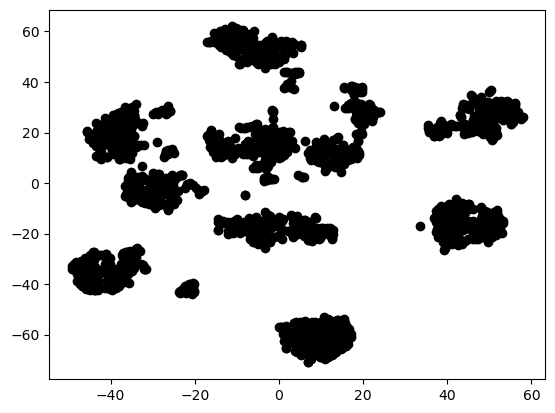

In [16]:
dots= plt.scatter(datosreducidos[:,0],datosreducidos[:,1],c="black")

Y el sacatter

Ahora haz el scatter con colores diferentes

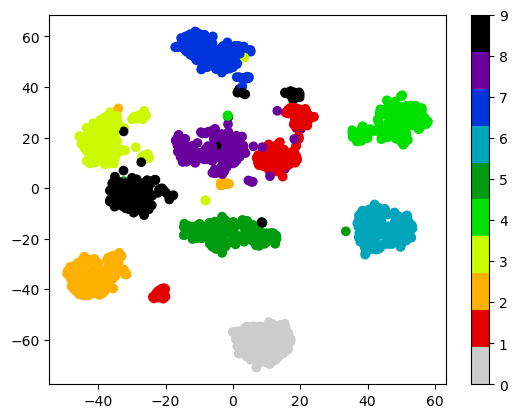

In [19]:
dots= plt.scatter(datosreducidos[:,0],datosreducidos[:,1],c=digits.target,cmap=plt.cm.get_cmap("nipy_spectral_r",10))
colorbar=plt.colorbar(dots)

## 15.7 Aprendizaje no supervisado parte 2

### 15.7.1  Cargar el Dataset de Iris

Carga load_iris de sklearn.datasets

In [20]:
from sklearn.datasets import load_iris as iris

Arma un objeto iris de load_iris

In [21]:
iris=iris()

Veamos la descripción del dataset

In [22]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Veamos la figura del iris.data

In [23]:
iris.data.shape

(150, 4)

La figura del iris.shape

In [24]:
iris.target.shape

(150,)

Conozcamos los posibles targets con target_names

In [25]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Y también los feature names

In [27]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### 15.7.2  Explorar el dataset de Iris

Importamos pandas

In [28]:
import pandas as pd 

Le decimos que maximo 5 columans

In [30]:
pd.set_option("display.max_columns",5)

Y sin display width

In [31]:
pd.set_option("display.width",None)

Cargamos un dataframe con iris.data

In [35]:
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Y le pegamos las especies que vienen de iris.target_names

In [36]:
iris_df["especie"]=[iris.target_names[i] for i in iris.target]

Checa el head del dataset

In [37]:
iris_df.head(20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),especie
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


Pon la precision de pandas a 2 decimales

In [38]:
pd.set_option("display.precision",2)

Armate un describe del dataframe

In [39]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


Y un describe de la columna de species solamente

In [40]:
iris_df["especie"].describe()

count        150
unique         3
top       setosa
freq          50
Name: especie, dtype: object

### 15.7.3  Visualizar el Dataset con Pairplot

Importa seaborn si no lo has hecho

In [42]:
import seaborn as sns

Cambia la fuente a 1.1

In [43]:
sns.set(font_scale=1.1)

Ponlo estilo whitegrid

In [44]:
sns.set_style("whitegrid")

Arma tu pairplot en un objeto llamado cuadricula

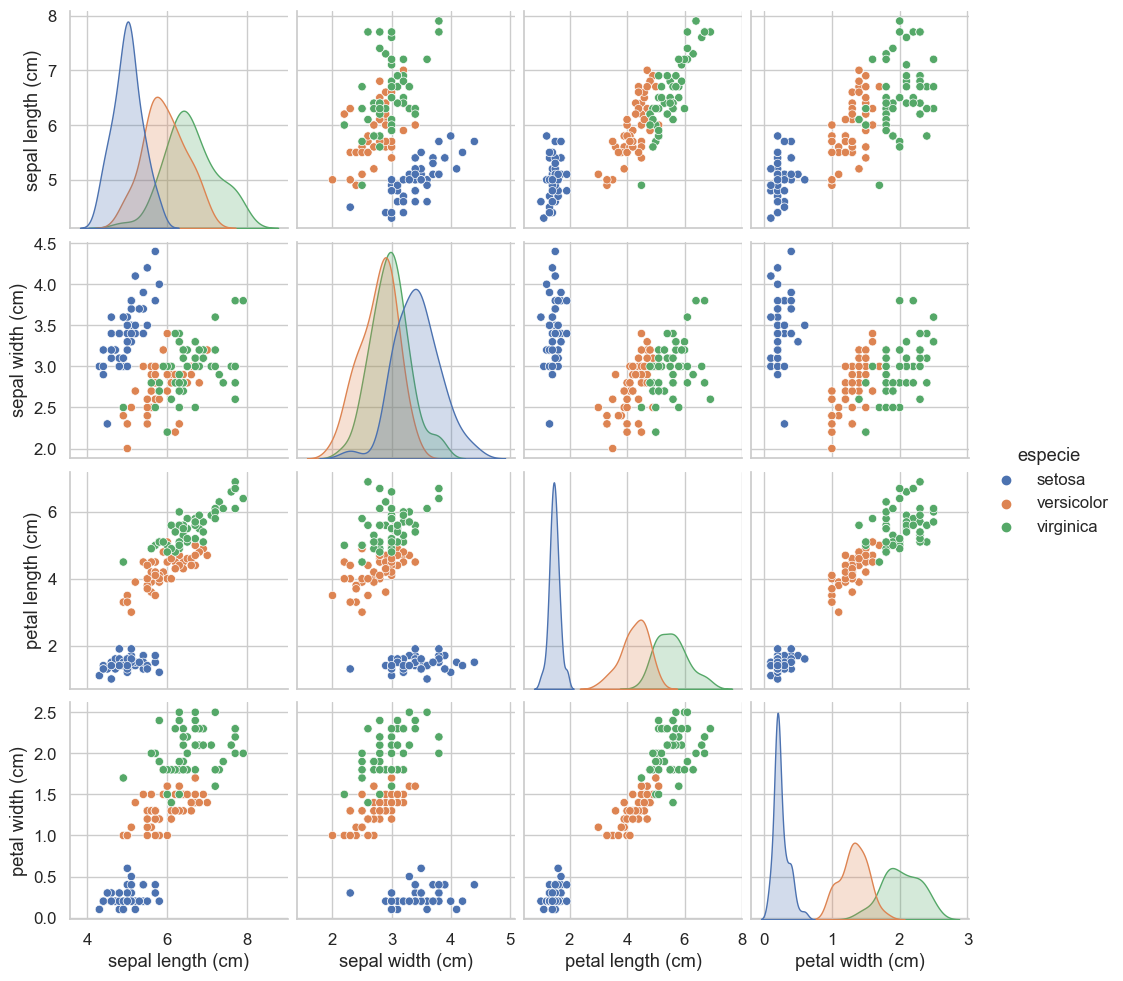

In [46]:
cuadricula = sns.pairplot(data=iris_df,vars=iris_df.columns[0:4],hue="especie")

Ahora mostremos el pairplot en un solo color

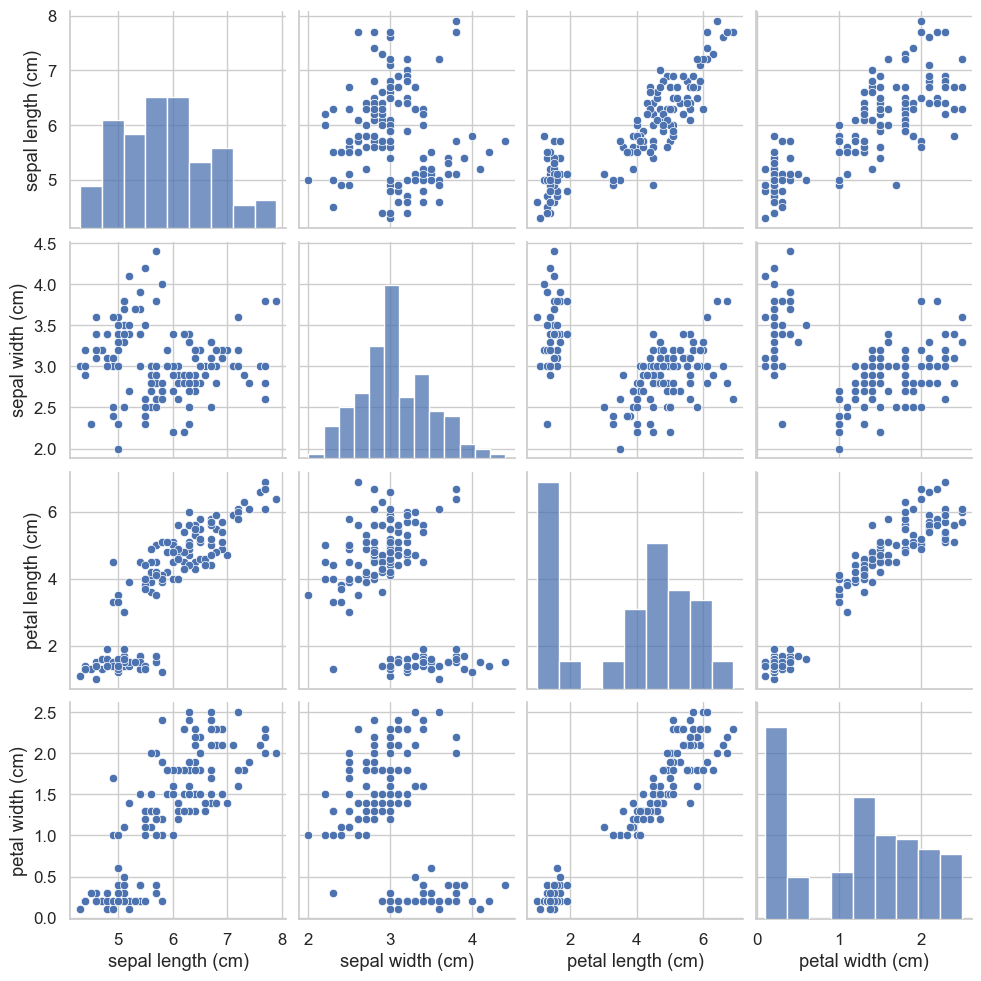

In [47]:
cuadricula = sns.pairplot(data=iris_df,vars=iris_df.columns[0:4])

### 15.7.4  Usar un estimador KMeans

Vamos a importar Kmeans desde sklearn.cluster

In [53]:
from sklearn.cluster import KMeans as km 

Ahora creamos el estimador, se establece el numero de clusters con n_cluster

In [54]:
kms=km(n_clusters=3,random_state=11)

Entrenamos el modelo con el metodo .fit

In [56]:
kms.fit(iris.data)

KMeans(n_clusters=3, random_state=11)

Imprimimos los primeros 50 resultados

In [57]:
print (kms.labels_[0:50])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


Ahora los segundos 50

In [58]:
print (kms.labels_[50:100])

[0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


Y los ultimos 50

In [59]:
print (kms.labels_[100:150])

[2 0 2 2 2 2 0 2 2 2 2 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2
 2 0 2 2 2 0 2 2 2 0 2 2 0]


### 15.7.4  Reducción de dimensionalidad con PCA

Importa PCA de sklearn.decomposition

In [60]:
from sklearn.decomposition import PCA

Arma tu estimador PCA

In [61]:
pca=PCA(n_components=2,random_state=11)

Arma el fit

In [62]:
pca.fit(iris.data)

PCA(n_components=2, random_state=11)

Y luego transforma los datos usando transform

In [63]:
iris_pca=pca.transform(iris.data)

checa la figura de los datos que devolvió

In [66]:
iris_pca.shape

(150, 2)

Veamos losd datos reducidos, pasa esos nuevos datos a un dataframe

In [67]:
iris_pca_df=pd.DataFrame(iris_pca,columns=["Componente1","Componente2"])

pegale la especie a ese dataframe

In [68]:
iris_pca_df["especie"]=iris_df.especie

arma un scatterplot en seaborn

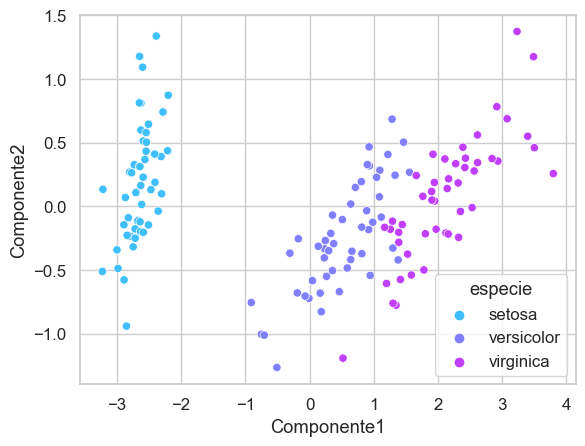

In [71]:
axes = sns.scatterplot(data = iris_pca_df,x="Componente1",y="Componente2",hue="especie",legend="brief",palette="cool")

Vamos armando un objeto centroide para mostrar en seaborn

In [74]:
iris_centros=pca.transform(kms.cluster_centers_)

importa matplotlib

In [76]:
import matplotlib.pyplot as pl

Muestra los scatter

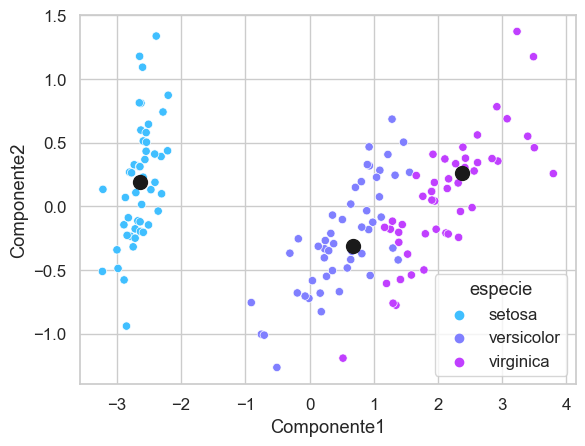

In [79]:
axes = sns.scatterplot(data = iris_pca_df,x="Componente1",y="Componente2",hue="especie",legend="brief",palette="cool")

dots=pl.scatter(iris_centros[:,0],iris_centros[:,1],s=100,c="k")

### 15.7.4  Escoger el mejor estimador de CLustering

importa DBSCAN, Meanshift, spectral clustering, agglomerative clustering

In [82]:
from sklearn.cluster import DBSCAN, MeanShift, SpectralClustering,AgglomerativeClustering

Arma un diccionario con los estimadores

In [89]:
estimadores = {"KMeans":kms , "DBSCAN":DBSCAN(),"MeanShift":MeanShift(),"SpectralClustering":SpectralClustering(n_clusters=3),"AgglomerativeClustering":AgglomerativeClustering(n_clusters=3)}

importa Numpy as np

In [86]:
import numpy as np

arma el for que va a hacer los estimadores

In [90]:
for nombre,estimador in estimadores.items():
    estimador.fit(iris.data)
    print(f'\n{nombre}:')
    for i in range(0,101,50):
        etiquetas,cuentas=np.unique(estimador.labels_[i:i+50],return_counts=True)
        print(f'{i}-{i+50}:')
        for etiqueta, cuenta in zip(etiquetas,cuentas):
            print(f'etiqueta={etiqueta},cuenta={cuenta}')


KMeans:
0-50:
etiqueta=1,cuenta=50
50-100:
etiqueta=0,cuenta=48
etiqueta=2,cuenta=2
100-150:
etiqueta=0,cuenta=14
etiqueta=2,cuenta=36

DBSCAN:
0-50:
etiqueta=-1,cuenta=1
etiqueta=0,cuenta=49
50-100:
etiqueta=-1,cuenta=6
etiqueta=1,cuenta=44
100-150:
etiqueta=-1,cuenta=10
etiqueta=1,cuenta=40

MeanShift:
0-50:
etiqueta=1,cuenta=50
50-100:
etiqueta=0,cuenta=49
etiqueta=1,cuenta=1
100-150:
etiqueta=0,cuenta=50

SpectralClustering:
0-50:
etiqueta=1,cuenta=50
50-100:
etiqueta=2,cuenta=50
100-150:
etiqueta=0,cuenta=35
etiqueta=2,cuenta=15

AgglomerativeClustering:
0-50:
etiqueta=1,cuenta=50
50-100:
etiqueta=0,cuenta=49
etiqueta=2,cuenta=1
100-150:
etiqueta=0,cuenta=15
etiqueta=2,cuenta=35
